In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: pho
"""
import sys
import ipyvolume as ipv
import numpy as np
import h5py
import hdf5storage # conda install hdf5storage
from pathlib import Path
import bqplot.scales
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
# import mplcursors
from scipy.ndimage.filters import gaussian_filter
import ipywidgets as widgets
# Imports PIL module
import PIL # For applying the binary mask as a image texture to a mesh
# import opencv
from IPython.display import display # For manual display customization

In [9]:
mat_import_file = '/Users/pho/repo/Python Projects/PhoNeuronGillespie2021CodeRepo/PhoMatlabDataScripting/ExportedData/RoyMaze1/positionAnalysis.mat'
print('Loading matlab import file: {}...'.format(mat_import_file))
data = hdf5storage.loadmat(mat_import_file, appendmat=False)
# np.shape(data)
print('done.')

Loading matlab import file: /Users/pho/repo/Python Projects/PhoNeuronGillespie2021CodeRepo/PhoMatlabDataScripting/ExportedData/RoyMaze1/positionAnalysis.mat...
done.


In [10]:
# data.keys()
t = np.squeeze(data['positionalAnalysis']['track_position']['t'])
x = np.squeeze(data['positionalAnalysis']['track_position']['x'])
y = np.squeeze(data['positionalAnalysis']['track_position']['y'])
speeds = np.squeeze(data['positionalAnalysis']['track_position']['speeds'])
dt = np.squeeze(data['positionalAnalysis']['displacement']['dt'])
dx = np.squeeze(data['positionalAnalysis']['displacement']['dx'])
dy = np.squeeze(data['positionalAnalysis']['displacement']['dy'])

print('shapes - t: {}, x: {}, y: {}'.format(np.shape(t), np.shape(x), np.shape(y))) 

extrema_min, extrema_max = np.nanmin(x), np.nanmax(x)
print('for x: extrema_min: {}, extrema_max: {}'.format(extrema_min, extrema_max))
extrema_min, extrema_max = np.nanmin(y), np.nanmax(y)
print('for y: extrema_min: {}, extrema_max: {}'.format(extrema_min, extrema_max))
 

shapes - t: (324574,), x: (324574,), y: (324574,)
for x: extrema_min: 74.29166666666666, extrema_max: 649.3020833333334
for y: extrema_min: 160.54166666666666, extrema_max: 263.0


point_heatmap_value: [604. 604. 604. ... 162. 162. 162.]


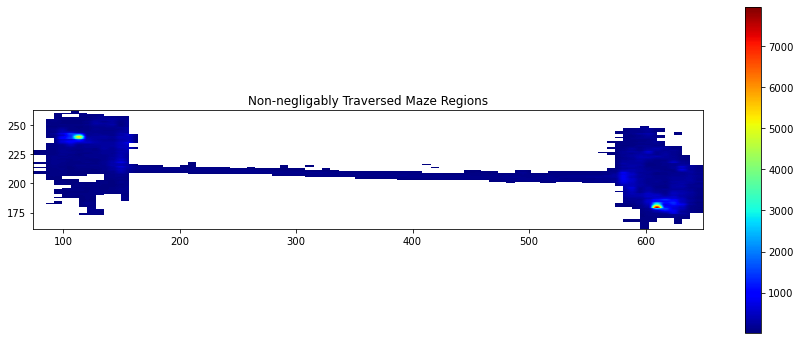

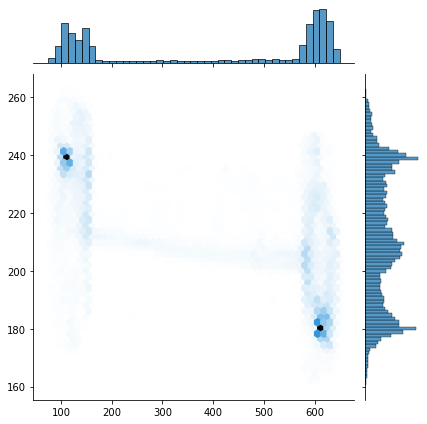

In [11]:
# Create a representation of the general maze layout by binning the data and then building a mask from all the points the animal ever traversed in the maze
# Output: negligably_traversed_maze_regions - an 80x80 binary mask that specifies which maze regions are never traversed.
def gen_2d_histrogram(x, y, sigma, bins=80):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, density=False)
#     heatmap = gaussian_filter(heatmap, sigma=sigma)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent, xedges, yedges

 
# For the 1.6m track, we want bins of ~2cm -> 80 bins
num_position_bins = 80
# position_bins = np.linspace(0.0, 1.6, num_position_bins)
# digitized_x = np.digitize(x, position_bins)
# digitized_y = np.digitize(y, position_bins)

smoothing_sigma = 2
img, extent, xedges, yedges = gen_2d_histrogram(x, y, smoothing_sigma)

## Get the histogram x that corresponds to each x, etc.
digitized_x = np.digitize(x, xedges)-1
digitized_y = np.digitize(y, yedges)-1

get_point_heatmap_value = lambda i, : img.T[(digitized_x[i]-1), (digitized_y[i]-1)]
point_heatmap_value = np.array(list(map(get_point_heatmap_value, range(0, len(digitized_x)))))


# Convert the values into a actual color vectors
cmap = cm.jet
norm = Normalize(vmin=np.min(point_heatmap_value), vmax=np.max(point_heatmap_value))
point_colors = cmap(norm(point_heatmap_value))

print('point_heatmap_value: {}'.format(point_heatmap_value))

# Want to build a color value for each point.
# for i in arange(0, len(x):
#     for j in arange(0, len(y):
                    
                

# print('img: {}'.format(np.shape(img)))
# img_mask = np.nonzero(img)
negligably_traversed_maze_regions = np.where(img < 25)
# print('negligably_traversed_maze_regions: {}'.format(np.shape(negligably_traversed_maze_regions)))
img_mask = img
img_mask[negligably_traversed_maze_regions] = np.nan
boosted_img = pow(img, 2)
# print('np.shape(img): {}, img: {}'.format(np.shape(img), img))

fig, ax = plt.subplots(figsize=(15,6))
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
# plt.imshow(img, origin='lower', cmap=cm.jet)
# plt.imshow(img_mask, extent=extent, origin='lower', cmap=cm.jet)
# plt.imshow(img_mask, extent=extent, origin='lower')
plt.colorbar()
plt.title('Non-negligably Traversed Maze Regions')

# extrema_min, extrema_max = np.nanmin(digitized_x), np.nanmax(digitized_x)
# print('for digitized_x: extrema_min: {}, extrema_max: {}'.format(extrema_min, extrema_max))
# extrema_min, extrema_max = np.nanmin(digitized_y), np.nanmax(digitized_y)
# print('for digitized_y: extrema_min: {}, extrema_max: {}'.format(extrema_min, extrema_max))


# print('({}, {})'.format(digitized_x, digitized_y))
# z_values = np.zeros([80, 80])
# z_values[digitized_x-1, digitized_y-1] = 1.0

# xx, yy = np.meshgrid(position_bins, position_bins)

# # xx, yy = np.meshgrid(digitized_x, digitized_y)

# plt.imshow(z_values, cmap='hot', interpolation='nearest')
# plt.hexbin(x, y, C=z_values, gridsize=gridsize, cmap=CM.jet, bins=None)
# ax = sns.heatmap(z_values, linewidth=0.5)
sns.jointplot(x=x, y=y, kind='hex')

plt.show()
# np.sum(

In [15]:
## Plot the raw position points

# # matplotlib version:
# ax = plt.axes(projection='3d')
# # z = np.zeros_like(x)
# z = point_heatmap_value
# ax.scatter3D(x, y, z, color=point_colors, s=1);

# ipyvolume version:
# Plot basic data:
fig = ipv.figure()
# z = point_heatmap_value
z = np.zeros_like(x)
scatter = ipv.scatter(x, y, z, color=point_colors, marker='diamond', size=0.2)
scatter.connected = False  # draw connecting lines

ipv.show()

In [16]:
# Projected Maze 2D Outline:
maze_outline_x = x
maze_outline_y = y


In [ ]:
# Split the position data into equal sized chunks to be displayed at a single time. These will look like portions of the trajectory and be used to animate.
Chunk the data to create the animation.
curr_view_window_length = 150 # View 5 seconds at a time (30fps)
# The original length 324574 / 30 = 10819

# drop 124 extra elements that make it no wrap evenly
trimmed_length = 324574 - 124
other_reshaped_dimension = 2163

t = t[0:trimmed_length].reshape(other_reshaped_dimension, curr_view_window_length)
x = x[0:trimmed_length].reshape(other_reshaped_dimension, curr_view_window_length)
y = y[0:trimmed_length].reshape(other_reshaped_dimension, curr_view_window_length)

speeds = speeds[0:trimmed_length].reshape(other_reshaped_dimension, curr_view_window_length)
dt = dt[0:trimmed_length].reshape(other_reshaped_dimension, curr_view_window_length)
dx = dx[0:trimmed_length].reshape(other_reshaped_dimension, curr_view_window_length)
dy = dy[0:trimmed_length].reshape(other_reshaped_dimension, curr_view_window_length)

print('shapes - t: {}, x: {}, y: {}'.format(np.shape(t), np.shape(x), np.shape(y)))


In [ ]:
# scales = {
#     'x': bqplot.scales.LinearScale(min=10**-3, max=10**3),
#     'y': bqplot.scales.LinearScale(min=-3, max=3),
#     'z': bqplot.scales.LinearScale(min=-3, max=3),
# }
# color_scale = bqplot.scales.ColorScale(min=0, max=3, colors=["#f00", "#0f0", "#00f"])

In [ ]:
# def scale_image(input_image_path,
#             output_image_path,
#             width=None,
#             height=None):
#     original_image = PIL.Image.open(input_image_path)
#     w, h = original_image.size
#     print('The original image size is {wide} wide x {height} '
#           'high'.format(wide=w, height=h))

#     if width and height:
#         max_size = (width, height)
#     elif width:
#         max_size = (width, h)
#     elif height:
#         max_size = (w, height)
#     else:
#         # No width or height specified
#         raise RuntimeError('Width or height required!')

# #     original_image.thumbnail(max_size, PIL.Image.ANTIALIAS)
#     scaled_image = original_image.resize(max_size)
#     scaled_image.save(output_image_path)

#     scaled_image = PIL.Image.open(output_image_path)
#     width, height = scaled_image.size
#     print('The scaled image size is {wide} wide x {height} '
#           'high'.format(wide=width, height=height))
    
    

# print('extent: {}\n'.format(extent))
# # a = np.arange(-5, 5)
# a = np.arange(extent[0], extent[1])
# b = np.arange(extent[2], extent[3])


# U, V = np.meshgrid(a, b)
# # U, V = np.meshgrid(a, a)
# X = U
# Y = V
# # Z = X*0.0
# Z = X*0.0

# # image = negligably_traversed_maze_regions
# # creating a image object (new image object) with
# # RGB mode and size 200x200
# # im = PIL.Image.new(mode="RGB", size=(200, 200))

# binary_img_mask = np.isnan(img_mask)
# # binary_img_mask[np.logical_not(negligably_traversed_maze_regions)] = 1 # Set any real number value to 1

# # print('np.shape(binary_img_mask): {}'.format(np.shape(binary_img_mask)))
# # im = PIL.Image.new(mode="1", size=np.shape(binary_img_mask))
# # im = PIL.Image.fromarray(np.uint8(255*binary_img_mask))
# # im = PIL.Image.fromarray(binary_img_mask)
# # im.save('export_mask_image.png')


# max_size = (np.round(extent[1] - extent[0]), np.round(extent[3] - extent[2]))
# print('max_size: {}'.format(max_size))

# im = PIL.Image.open('export_mask_image_fullsize.png')

# # Z = np.asarray(im)
# # print(Z)
# # scale_image(input_image_path='export_mask_image.png',
# #                  output_image_path='export_mask_image_fullsize.png',
# #                  width=int(np.round(extent[1] - extent[0])), height=int(np.round(extent[3] - extent[2])))

# # im = PIL.Image.open('export_mask_image.png')

# # Build larger image:
# # im.thumbnail(max_size, PIL.Image.ANTIALIAS)
# # output_image_path = 'export_mask_image_fullsize.png'
# # im.save(output_image_path)
# # im.show()


# ipv.figure()
# # ipv.style.use('dark')
# # ipv.plot_surface(X, Z, Y, color="orange")
# # ipv.plot_wireframe(X, Z, Y, color="red")

# # u = np.array([X/5 +np.sin(k/8*np.pi)*4. for k in range(3)])
# # v = np.array([-Y/5*(1-k/7.) + Z*(k/7.) for k in range(3)])

# # mesh = ipv.plot_mesh(X, Z, Y, texture=im, wireframe=False)
# # mesh = ipv.plot_surface(X, Z, Y, texture=im)
# mesh = ipv.plot_mesh(X, Z, Y, u=U, v=V, texture=im, wireframe=False)

# ipv.show()

In [ ]:
# Plot basic data:
fig = ipv.figure()
# fig = ipv.figure(scales=scales)
ipv.style.use('dark')
ipv.clear()
# u = np.array([X/5 +np.sin(k/1*np.pi)*4. for k in range(len(X))])
# u = np.linspace(-1.0, 1.0, len(X))
# v = np.linspace(-1.0, 1.0, len(X))
# v = np.array([-Y/5*(1-k/7.) + Z*(k/7.) for k in range(len(X))])
# u = np.array([0.0, 1.0, 1.0, 0.0])
# v = np.array([0.0, 0.0, 1.0, 1.0])
# mesh = ipv.plot_mesh(X, Z, Y, u=u, v=v, texture=im, wireframe=False)
# ipv.plot_surface(X, Z, Y, color="black")
# ipv.plot_wireframe(X, Z, Y, color="grey")

# ipv.pylab.plot_surface()
# s = ipv.scatter(x, y, 0*x, marker='sphere', size=1)

# colors = np.zeros([
# s = ipv.scatter(maze_outline_x, (0.0 * maze_outline_x), maze_outline_y, marker='sphere', size=1, color='black')
# ipv.animation_control(s, interval=200) # shows controls for animation controls

quiver = ipv.quiver(x, t, y, dx, dt, dy, size=2.0, size_selected=2, color_selected="blue")
ipv.animation_control(quiver, interval=200) # shows controls for animation controls

ipv.show()

In [ ]:
x, y, z, u, v, w = np.random.random((6, 1000))*2-1
selected = np.random.randint(0, 1000, 100)
ipv.figure()
quiver = ipv.quiver(x, y, z, u, v, w, size=5, size_selected=8, selected=selected)

from ipywidgets import FloatSlider, ColorPicker, VBox, jslink
size = FloatSlider(min=0, max=30, step=0.1)
size_selected = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
color_selected = ColorPicker()
jslink((quiver, 'size'), (size, 'value'))
jslink((quiver, 'size_selected'), (size_selected, 'value'))
jslink((quiver, 'color'), (color, 'value'))
jslink((quiver, 'color_selected'), (color_selected, 'value'))
VBox([ipv.gcc(), size, size_selected, color, color_selected])